# Startup Transformation

In [207]:
from sklearn import preprocessing
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import numpy as np
from scipy.stats import pearsonr

In [27]:
employees = pd.read_csv('employees.csv')
expenses_overview = pd.read_csv('expenses.csv')
financial_data = pd.read_csv('financial_data.csv')

In [20]:
print(employees.head())


                Name  Salary  Productivity  Commute Time
0     Mason Pender     87902         29.91         16.79
1          Mia Rew     95672         49.91         44.48
2   Jalisa Kroenke    177864         78.00         19.40
3  Krystal Homeyer    186643         24.36         42.06
4    Kiana Wishart    167148          4.08         25.58


In [28]:
print(expenses_overview.head())


       Expense  Proportion
0     Salaries        0.62
1  Advertising        0.15
2  Office Rent        0.15
3    Equipment        0.03
4    Utilities        0.03


In [22]:
print(financial_data.head())

   Month  Revenue  Expenses
0      1  1420000    510000
1      2  1200000    532000
2      3  1050000    551000
3      4   920000    612000
4      5   807000    628000


### Analyzing Revenue and Expenses

In [30]:
month = financial_data.Month
revenue = financial_data.Revenue
expenses = financial_data.Expenses

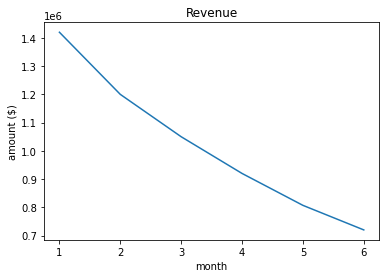

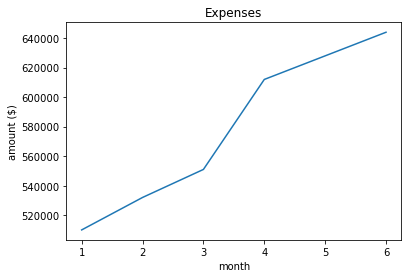

In [31]:
plt.plot(month, revenue)
plt.xlabel('month')
plt.ylabel('amount ($)')
plt.title('Revenue')
plt.show()

plt.clf()
plt.plot(month, expenses)
plt.xlabel('month')
plt.ylabel('amount ($)')
plt.title('Expenses')
plt.show()


### Pie Chart and Collapsing Categories

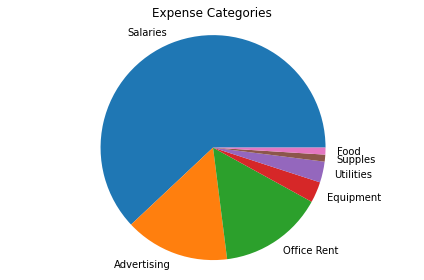

In [43]:
expenses_categories = expenses_overview.Expense
expenses_proportions = expenses_overview.Proportion

plt.clf()
plt.pie(expenses_proportions, labels = expenses_categories, normalize = False)
plt.title('Expense Categories')
plt.axis('equal')
plt.tight_layout()
plt.show()

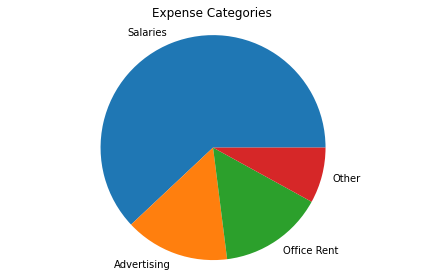

In [44]:
expenses_categories_mod = ['Salaries', 'Advertising', 'Office Rent', 'Other']
expenses_proportions_mod =[0.62, 0.15, 0.15, 0.08]

plt.clf()
plt.pie(expenses_proportions_mod, labels = expenses_categories_mod, normalize = False)
plt.title('Expense Categories')
plt.axis('equal')
plt.tight_layout()
plt.show()

### Employee Productivity

In [47]:
sorted_productivity = employees.sort_values(by = ['Productivity'])
print(sorted_productivity)

                  Name  Salary  Productivity  Commute Time
259       Wilber Rye    111647          0.06         49.42
92    Fredric Gandee    154469          0.24         22.48
252  Johnson Fordham    168684          1.46         22.39
178    Lilia Lemoine    167579          1.67         27.36
162   Hilma Laughton     85506          1.79         36.41
..                 ...     ...           ...           ...
164      Miki Hartle     50856         99.54         31.39
88        Darell Nau     30530         99.63         44.25
23    Joaquina Neece     95562         99.66         48.65
202    Janae Officer    110139         99.69         15.45
6    Jacinta Dunford    130968         99.98         44.53

[300 rows x 4 columns]


In [50]:
employees_cut = sorted_productivity.head(100)
print(employees_cut)

                       Name  Salary  Productivity  Commute Time
259            Wilber Rye    111647          0.06         49.42
92         Fredric Gandee    154469          0.24         22.48
252       Johnson Fordham    168684          1.46         22.39
178         Lilia Lemoine    167579          1.67         27.36
162        Hilma Laughton     85506          1.79         36.41
..                      ...     ...           ...           ...
43   Bernardo Klingenberg     55464         34.52         32.27
186        Ashleigh Istre    178627         34.70         38.67
288       Penni Kimbrough    142680         35.21         49.64
269      Margot Mackenzie    114302         35.79         19.87
218        Quinn Frampton     44000         36.36         34.12

[100 rows x 4 columns]


### Commute Times and Log Transformation

In [52]:
commute_times = employees['Commute Time']
print(commute_times.describe())

count    300.000000
mean      33.441700
std       16.128369
min        3.220000
25%       21.667500
50%       31.060000
75%       42.190000
max      101.780000
Name: Commute Time, dtype: float64


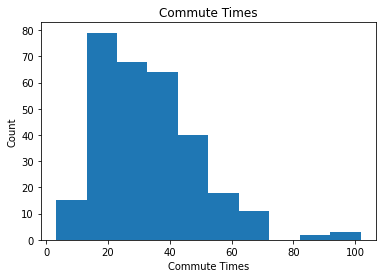

In [56]:
plt.clf()
plt.hist(commute_times)
plt.xlabel('Commute Times')
plt.ylabel('Count')
plt.title('Commute Times')
plt.show()

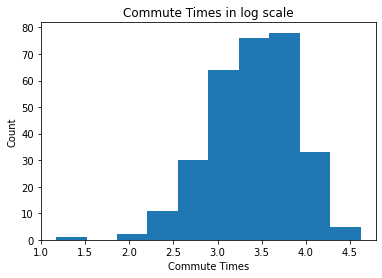

In [55]:
commute_times_log = np.log(commute_times)
plt.clf()
plt.hist(commute_times_log)
plt.xlabel('Commute Times')
plt.ylabel('Count')
plt.title('Commute Times in log scale')
plt.show()

### Standardization

In [60]:
print(employees.dtypes)

Name             object
Salary            int64
Productivity    float64
Commute Time    float64
dtype: object


In [61]:
salary = employees.Salary
productivity = employees.Productivity

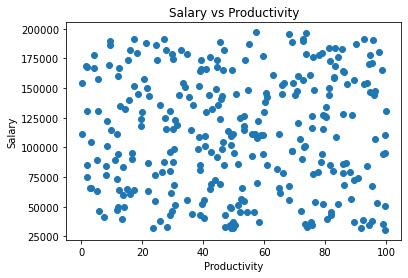

In [201]:
plt.clf()
plt.scatter(productivity, salary)

plt.xlabel('Productivity')
plt.ylabel('Salary')
plt.title('Salary vs Productivity')
plt.show()

### Covarianza

In [202]:
print(np.cov(productivity, salary))

[[8.08701959e+02 2.48241244e+04]
 [2.48241244e+04 2.36393289e+09]]


### Correlation

In [210]:
corr, p=pearsonr(productivity, salary)
print(corr)

0.017954037153537494


In [189]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
#from sklearn.preprocessing import MinMaxScaler
#scaler = MinMaxScaler()
data = employees.iloc[:,[1,2]]
normalized_data = scaler.fit_transform(data)
print(normalized_salary)


[[-0.49164752 -0.74247673]
 [-0.33157069 -0.03800953]
 [ 1.3617414   0.95141466]
 [ 1.54260556 -0.93796638]
 [ 1.14097135 -1.65229613]
 [-1.17159292 -0.94888563]
 [ 0.39559428  1.72562412]
 [-0.61406407  0.46850239]
 [-0.93936821  0.06167258]
 [-1.59393206  1.52379427]
 [ 0.2446441  -0.18946998]
 [-0.44463397  0.74923258]
 [-0.01597005  0.17685297]
 [-1.42326584  1.08843354]
 [ 0.7044581   0.342755  ]
 [-1.41069868 -0.77241659]
 [ 0.4734489  -1.3500797 ]
 [-1.24481211  0.01306434]
 [-0.88668913 -0.72521729]
 [ 1.32634732  1.1676861 ]
 [ 0.30892205  0.8700487 ]
 [ 0.86832568  1.50195579]
 [-1.41111072 -0.42476202]
 [-0.3338369   1.71435265]
 [ 0.2241246   0.23955055]
 [-0.36049577 -1.37262265]
 [-0.01980201  0.30682717]
 [-1.56292618  1.68828736]
 [ 1.08769481 -0.42511426]
 [ 1.20648542  1.52555544]
 [-0.71843334 -1.50893706]
 [-1.22175857  1.17050397]
 [-0.94287053 -1.69667757]
 [-1.17449779  0.07822756]
 [-1.49695887  1.46426679]
 [-1.61968444 -0.81292346]
 [-0.66153086 -0.87068977]
 

In [190]:
print(employees.iloc[:,[1,2]])

     Salary  Productivity
0     87902         29.91
1     95672         49.91
2    177864         78.00
3    186643         24.36
4    167148          4.08
..      ...           ...
295   55465         52.61
296  160453         12.15
297  164297         85.84
298  148398         76.27
299  149973         81.26

[300 rows x 2 columns]


In [191]:
new_dat = pd.DataFrame(normalized_data, columns = ['normalized_salary', 'normalized_prod'])
print(new_dat)

     normalized_salary  normalized_prod
0            -0.491648        -0.742477
1            -0.331571        -0.038010
2             1.361741         0.951415
3             1.542606        -0.937966
4             1.140971        -1.652296
..                 ...              ...
295          -1.159912         0.057094
296           1.003042        -1.368044
297           1.082235         1.227566
298           0.754686         0.890478
299           0.787134         1.066243

[300 rows x 2 columns]


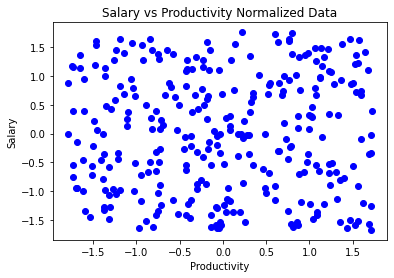

In [192]:
plt.clf()
plt.plot(new_dat.normalized_prod, new_dat.normalized_salary, 'bo')

plt.xlabel('Productivity')
plt.ylabel('Salary')
plt.title('Salary vs Productivity Normalized Data')
plt.show()

## Applying Machine Learning 

### Normal equation

In [193]:
ones1 = np.ones(len(new_dat.normalized_salary))
X = np.transpose(np.matrix([ones1,new_dat.normalized_prod]))
y = np.transpose(np.matrix(new_dat.normalized_salary))


In [194]:

def theta(X,y):
    theta = np.linalg.inv(np.transpose(X) * X) * np.transpose(X) * y
    return theta

theta_1 = theta(X,y)
print(theta(X,y))

[[-9.41087486e-17]
 [ 1.79540372e-02]]


### Predicting

In [195]:
def predicting(theta_0, theta_1, prod):
    y = theta_0 + theta_1 * prod
    return y


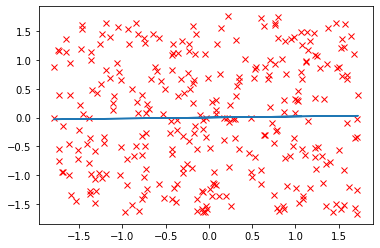

In [197]:
plt.clf()
plt.plot(new_dat.normalized_prod, new_dat.normalized_salary, 'rx')
plt.plot(new_dat.normalized_prod, [theta_1[0,0] + theta_1[1,0] * item for item in new_dat.normalized_prod])
plt.show()

In [150]:
prod = float(input("Introduce tu productividad: "))
print("Tu salario debe ser {}".format(predicting(theta(X,y)[0,0], theta(X,y)[1,0], prod)))

Introduce tu productividad: -0.742477
Tu salario debe ser -0.013330459643647126


### Gradient Descent

In [173]:
iterations = int(input("Introduce el número de iteraciones: "))
alpha = float(input("Introduce el parámetro alpha: "))

theta = np.transpose(np.matrix(np.zeros(2)))
def grad_desc(X, y, theta, alpha, iterations):
    m = len(y)
    thet = theta
    for i in range(iterations):
        h = X * thet
        z= (np.transpose(X) * (h - y))/ m
        thet = thet -alpha * z
    return thet

theta_2 = grad_desc(X,y, theta, alpha, iterations)
print(theta_2)


Introduce el número de iteraciones: 1500
Introduce el parámetro alpha: 0.01
[[-1.19682042e-16]
 [ 1.79540321e-02]]


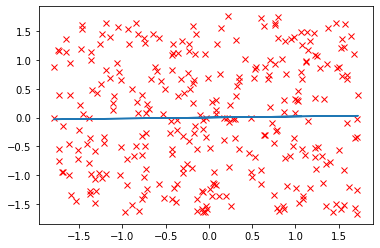

In [198]:
plt.clf()
plt.plot(new_dat.normalized_prod, new_dat.normalized_salary, 'rx')
plt.plot(new_dat.normalized_prod, [theta_2[0,0] + theta_2[1,0] * item for item in new_dat.normalized_prod])
plt.show()

In [174]:
prod = float(input("Introduce tu productividad: "))
print("Tu salario debe ser {}".format(predicting(theta_2[0,0], theta_2[1,0], prod)))

Introduce tu productividad: -0.742477
Tu salario debe ser -0.013330455862382991
